In [19]:
import cv2
import numpy as np
import os

# 讀取圖片
image_path = "good_coffee_beans.jpeg"
image = cv2.imread(image_path)

# 轉換為灰階
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 使用高斯模糊降低噪聲
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

# 二值化處理（Otsu 門檻處理）
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 應用形態學運算來去除小的雜訊
kernel = np.ones((5, 5), np.uint8)
binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# 重新偵測輪廓
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 過濾輪廓：根據面積大小 & 橢圓度
filtered_contours = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h  # 計算長寬比
    area = cv2.contourArea(contour)

    if 1000 < area < 40000 and 0.3 < aspect_ratio < 2:
        filtered_contours.append(contour)

# 建立輸出資料夾
output_folder = "crop"
os.makedirs(output_folder, exist_ok=True)

# 清空資料夾內的舊檔案
for f in os.listdir(output_folder):
    os.remove(os.path.join(output_folder, f))

# 繪製新的輪廓並裁切咖啡豆
for i, contour in enumerate(filtered_contours):
    x, y, w, h = cv2.boundingRect(contour)
    bean_crop = image[y:y+h, x:x+w]
    bean_path = os.path.join(output_folder, f"bean_{i}.jpg")
    cv2.imwrite(bean_path, bean_crop)

print(f"✅ 共偵測到 {len(filtered_contours)} 顆咖啡豆，已儲存於 '{output_folder}' 資料夾！")


✅ 共偵測到 21 顆咖啡豆，已儲存於 'crop' 資料夾！


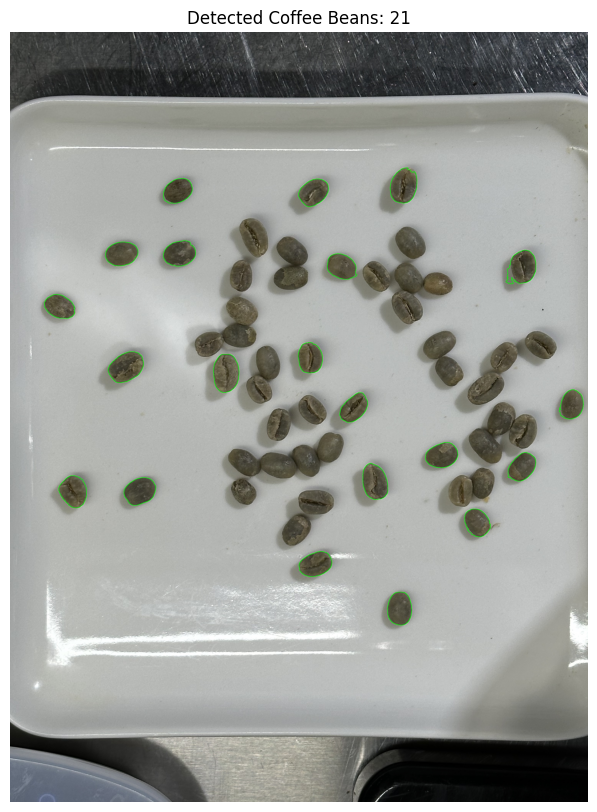

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取上傳的圖片
image_path = "good_coffee_beans.jpeg"
image = cv2.imread(image_path)

# 轉換為灰階
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 使用高斯模糊降低噪聲
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

# 二值化處理（Otsu 門檻處理）
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 應用形態學運算來去除小的雜訊
kernel = np.ones((5, 5), np.uint8)
binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# 重新偵測輪廓
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 過濾輪廓：根據面積大小 & 橢圓度
filtered_contours = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h  # 計算長寬比
    area = cv2.contourArea(contour)

    if 1000 < area < 40000 and 0.3 < aspect_ratio < 2:
        filtered_contours.append(contour)

# 在原圖上畫出檢測到的輪廓
output_image = image.copy()
cv2.drawContours(output_image, filtered_contours, -1, (0, 255, 0), 2)

# 顯示處理後的影像
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(f"Detected Coffee Beans: {len(filtered_contours)}")
plt.show()
